In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Latihan Project/hr-analytics-attrition/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,No,Non-Travel,635,Sales,10,4,Medical,1,592,...,4,80,0,10,3,2,10,3,9,7
405,25,Yes,Travel_Rarely,688,Research & Development,3,3,Medical,1,538,...,3,80,1,6,5,3,2,2,0,2
783,41,No,Travel_Rarely,509,Research & Development,7,2,Technical Degree,1,1085,...,3,80,0,10,3,3,10,6,0,8
732,30,Yes,Travel_Frequently,109,Research & Development,5,3,Medical,1,1017,...,1,80,0,4,3,3,3,2,1,2
1358,31,No,Travel_Rarely,1079,Sales,10,2,Medical,1,1912,...,4,80,1,8,2,3,5,2,1,4


### Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
pd.set_option('display.max_colwidth', None)
summary = []

for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].dropna().unique()
    unique_vals_str = "{" + ", ".join(map(str, unique_vals)) + "}"
    row = {
        'Column': col,
        'Unique Values': unique_vals_str
    }
    summary.append(row)

summary_df = pd.DataFrame(summary)
summary_df

,Column,Unique Values
0,Attrition,"{Yes, No}"
1,BusinessTravel,"{Travel_Rarely, Travel_Frequently, Non-Travel}"
2,Department,"{Sales, Research & Development, Human Resources}"
3,EducationField,"{Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources}"
4,Gender,"{Female, Male}"
5,JobRole,"{Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources}"
6,MaritalStatus,"{Single, Married, Divorced}"
7,Over18,{Y}
8,OverTime,"{Yes, No}"


In [ ]:
print(df['Attrition'].value_counts(normalize=True) * 100)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
df['Tenure'] = df['TotalWorkingYears'] - df['YearsAtCompany']

In [ ]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Tenure']

In [ ]:
categorical = df.select_dtypes(include='object').columns.tolist()
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

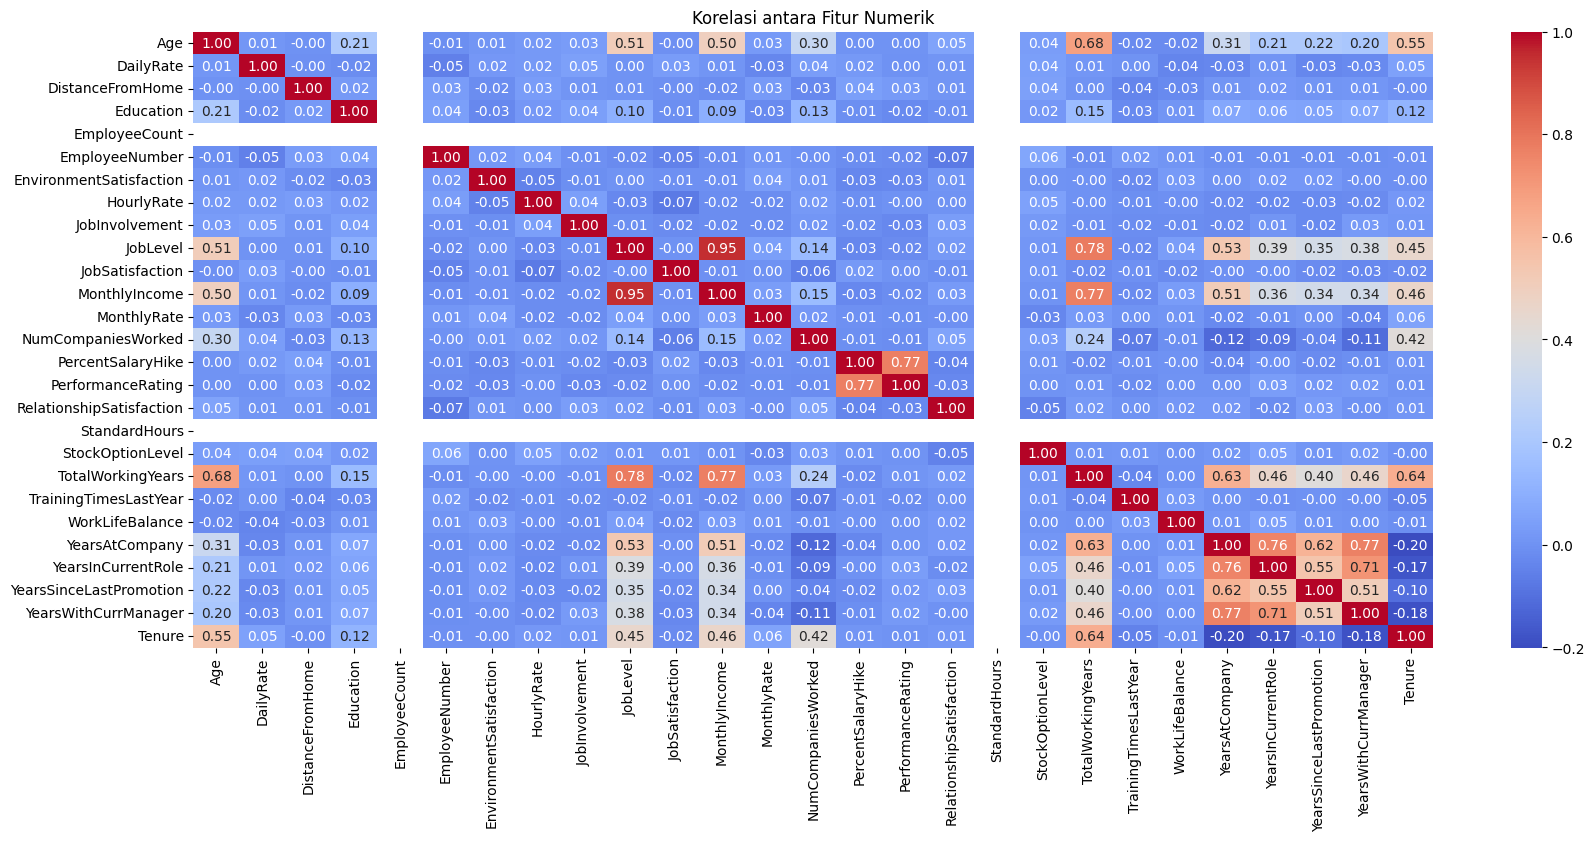

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df[numeric].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Fitur Numerik")
plt.show()

In [ ]:
df['EmployeeCount'].unique()

array([1])

## EDA

### Berapa persen karyawan yang resign?

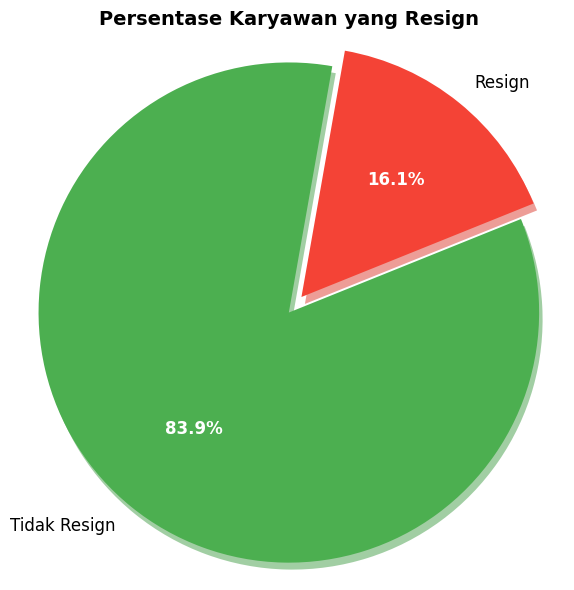

In [ ]:
attrition_counts = df['Attrition'].value_counts()
labels = ['Tidak Resign', 'Resign'] if 'No' in attrition_counts.index else attrition_counts.index.tolist()
sizes = attrition_counts.values
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie( sizes,labels=labels,autopct='%1.1f%%',
    explode=(0, 0.08),shadow={'ox': 0.01, 'edgecolor': 'none', 'shade': 0.1},startangle=80,colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=12)
plt.title('Persentase Karyawan yang Resign', fontsize=14, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

### Apakah usia muda lebih sering resign?

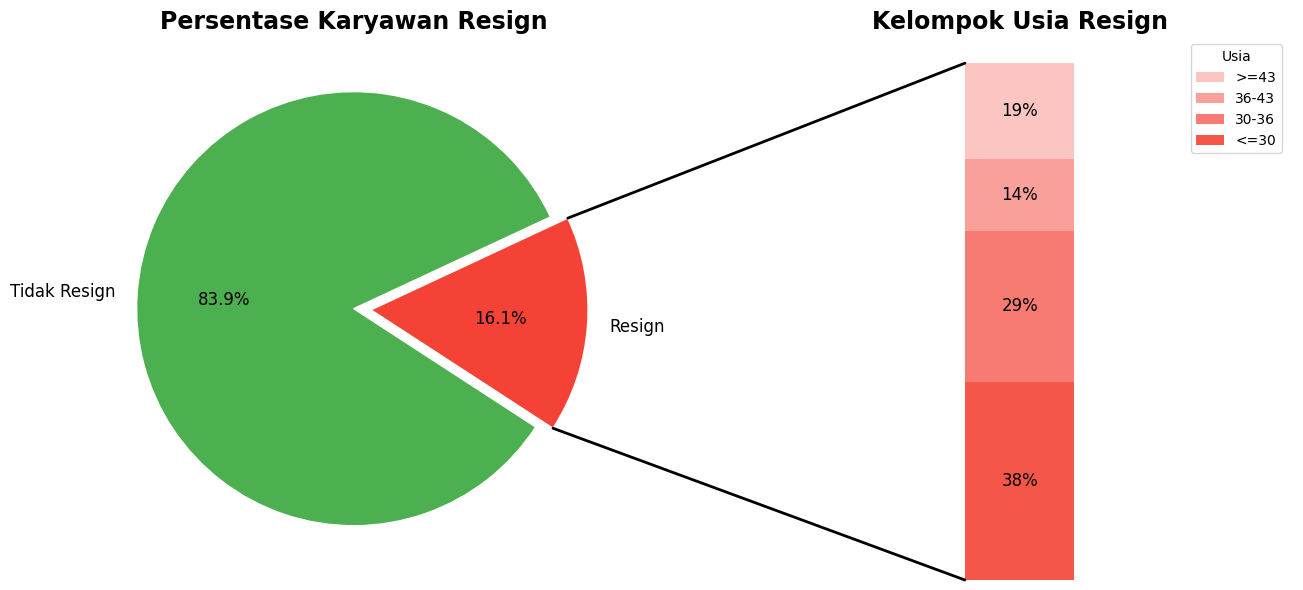

In [ ]:
# Kelompok usia
bins = [0, 30, 36, 43, df['Age'].max()]  # Berdasarkan Kuartil
labels_age = ['<=30', '30-36', '36-43', '>=43']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels_age, right=False)

# Pie chart data
attrition_counts = df['Attrition'].value_counts(normalize=True).sort_index()
pie_labels = ['Tidak Resign', 'Resign']
pie_sizes = attrition_counts.values
pie_colors = ['#4CAF50', '#F44336']

# Bar chart data
resign_by_age = df[df['Attrition'] == 'Yes']['AgeGroup'].value_counts(normalize=True).sort_index()
bar_heights = resign_by_age.values
bar_labels = resign_by_age.index.tolist()
bar_colors = ['#F44336', '#F44336', '#F44336', '#F44336']
bar_alpha  = [0.9, 0.7, 0.5, 0.3]

# Set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.subplots_adjust(wspace=0)

# --- PIE CHART (kiri) ---
angle = 25
wedges, texts, autotexts = ax1.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%',
                                   startangle=angle, colors=pie_colors, explode=(0, 0.08),
                                   wedgeprops=dict(edgecolor='white'))

for text in texts + autotexts:
    text.set_fontsize(12)

ax1.set_title('Persentase Karyawan Resign', fontsize=17, fontweight='bold')  # Judul besar

# --- BAR CHART (kanan) ---
bottom = 1
width = 0.1
for i, (height, label, color, alpha) in enumerate(zip(reversed(bar_heights), reversed(bar_labels), reversed(bar_colors), reversed(bar_alpha))):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, label=label, color=color, alpha=alpha)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center', fontsize=12)

ax2.set_title('Kelompok Usia Resign', fontsize=17, fontweight='bold')
ax2.legend(title='Usia', bbox_to_anchor=(0.8, 1), loc='upper left')
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# --- ConnectionPatch dari slice 'Resign' (di kanan pie) ke bar ---
theta1, theta2 = wedges[1].theta1, wedges[1].theta2  # 'Resign'
center, r = wedges[1].center, wedges[1].r
bar_height = sum(bar_heights)

# Garis atas
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con_top = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData,
                          color='black', linewidth=2)
ax2.add_artist(con_top)

# Garis bawah
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con_bottom = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                             xyB=(x, y), coordsB=ax1.transData,
                             color='black', linewidth=2)
ax2.add_artist(con_bottom)

plt.tight_layout()
plt.show()


### Apa pengaruh marital status terhadap resign?

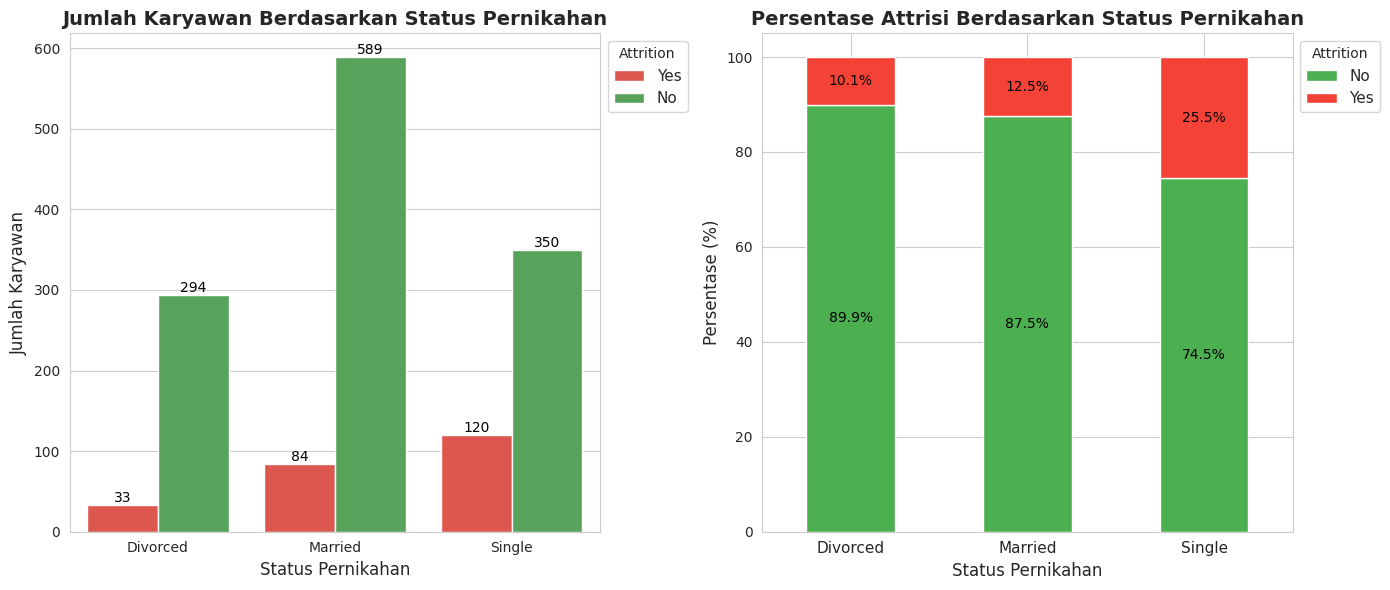

In [ ]:
stacked_data = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

marital_count = stacked_data.sort_values(by='Yes')[['Yes']].index.tolist()
marital_percentage = stacked_data_percentage.sort_values(by='Yes')[['Yes']].index.tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.set_style("whitegrid")

sns.countplot(data=df, x='MaritalStatus', hue='Attrition', order=marital_count, palette=['#F44336', '#4CAF50'], ax=axes[0])
axes[0].set_title("Jumlah Karyawan Berdasarkan Status Pernikahan", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Status Pernikahan", fontsize=12)
axes[0].set_ylabel("Jumlah Karyawan", fontsize=12)
axes[0].set_xticks([0, 1, 2])
axes[0].legend(title='Attrition', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

stacked_data_percentage_plot = stacked_data_percentage.loc[marital_percentage]
stacked_data_percentage_plot.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'], ax=axes[1])
axes[1].set_title("Persentase Attrisi Berdasarkan Status Pernikahan", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Status Pernikahan", fontsize=12)
axes[1].set_ylabel("Persentase (%)", fontsize=12)
axes[1].set_xticklabels(stacked_data_percentage_plot.index, rotation=0, fontsize=11)
axes[1].legend(title='Attrition', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Apakah jarak ke tempat kerja mempengaruhi keputusan resign?

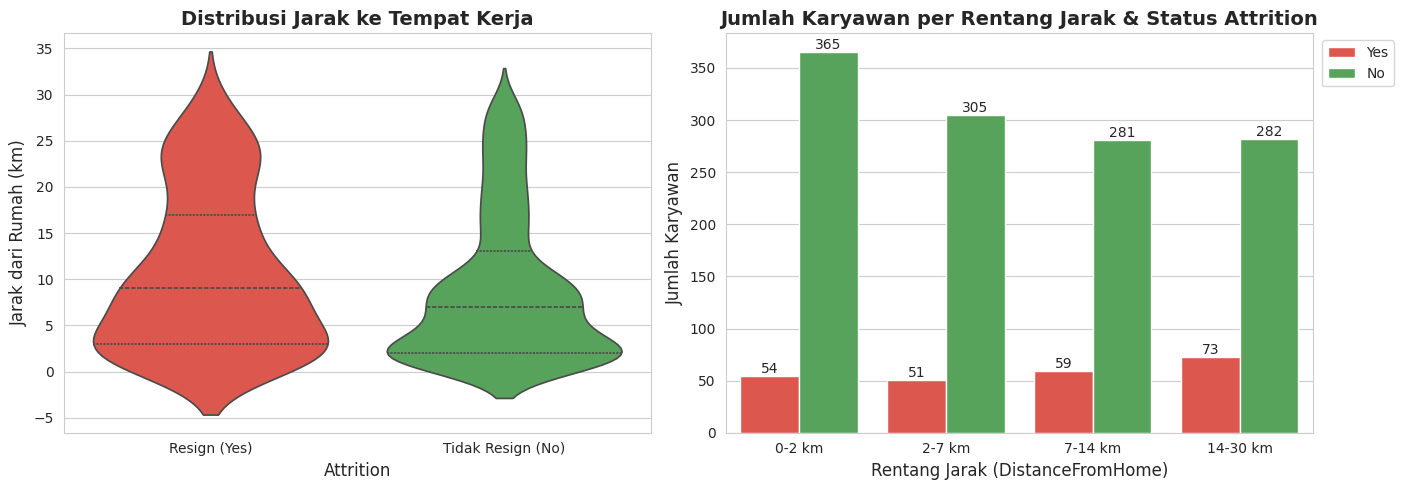

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.violinplot( data=df, x='Attrition', y='DistanceFromHome', hue='Attrition', inner='quartile', palette=['#F44336', '#4CAF50'], legend=False, ax=axes[0])
axes[0].set_title("Distribusi Jarak ke Tempat Kerja", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Attrition", fontsize=12)
axes[0].set_ylabel("Jarak dari Rumah (km)", fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Resign (Yes)', 'Tidak Resign (No)'])

bins1 =[0, 2, 7, 14, 30]
labels1 = ['0-2 km','2-7 km','7-14 km','14-30 km']
df['DistanceRange'] = pd.cut(df['DistanceFromHome'], bins=bins1, labels=labels1)

sns.countplot( x='DistanceRange', hue='Attrition', data=df, palette=['#F44336', '#4CAF50'], ax=axes[1])
axes[1].set_title("Jumlah Karyawan per Rentang Jarak & Status Attrition", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Rentang Jarak (DistanceFromHome)", fontsize=12)
axes[1].set_ylabel("Jumlah Karyawan", fontsize=12)
axes[1].tick_params(axis='x')
axes[1].legend(bbox_to_anchor=(1.15,1))

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()
plt.show()

### Job role mana yang paling banyak resign?

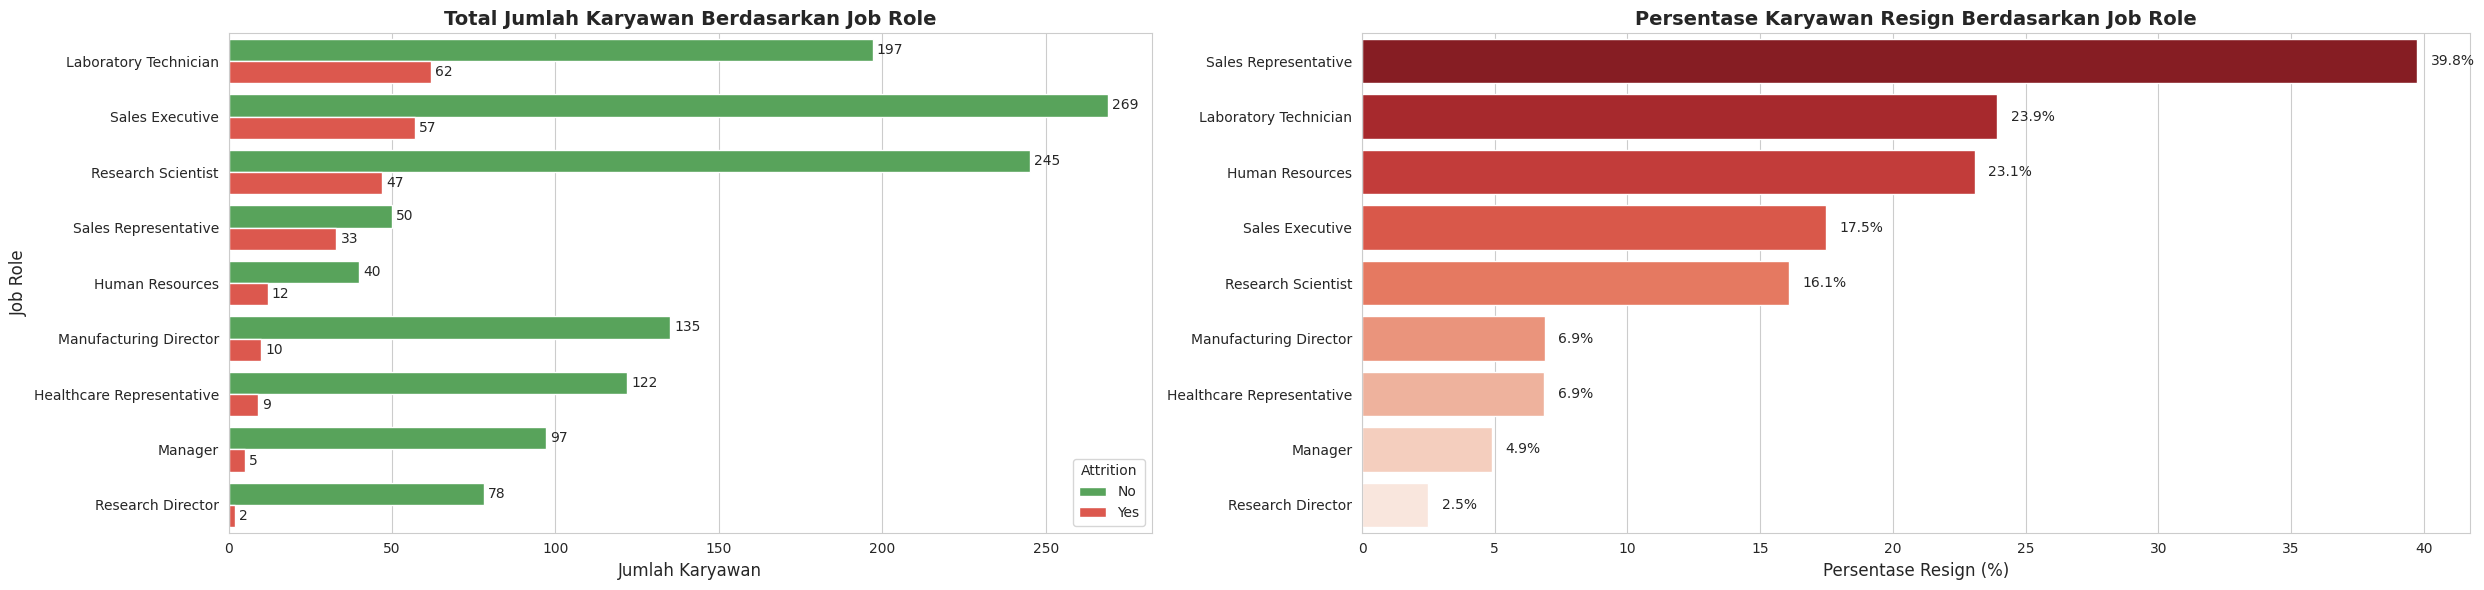

In [ ]:
attrition_counts = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()
total_counts = df['JobRole'].value_counts()
attrition_percentage = (attrition_counts / total_counts) * 100

sorted_roles_count = attrition_counts.sort_values(ascending=False).index
sorted_roles_percentage = attrition_percentage.sort_values(ascending=False).index

colors = ['#4CAF50', '#F44336']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6), gridspec_kw={'width_ratios': [1, 1.2]})

sns.countplot(data=df, y='JobRole', hue='Attrition', palette={'No': colors[0], 'Yes': colors[1]}, hue_order=['No', 'Yes'], order=sorted_roles_count, ax=axes[0])
axes[0].set_title("Total Jumlah Karyawan Berdasarkan Job Role", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Jumlah Karyawan", fontsize=12)
axes[0].set_ylabel("Job Role", fontsize=12)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', fontsize=10, padding=3)

sns.barplot(x=attrition_percentage.loc[sorted_roles_percentage].values, y=sorted_roles_percentage, hue=sorted_roles_percentage, palette=sns.color_palette("Reds_r", n_colors=len(sorted_roles_percentage)), legend=False, ax=axes[1])
axes[1].set_title("Persentase Karyawan Resign Berdasarkan Job Role", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Persentase Resign (%)", fontsize=12)
axes[1].set_ylabel("")

for index, value in enumerate(attrition_percentage.loc[sorted_roles_percentage].values):
    axes[1].text(value + 0.5, index, f"{value:.1f}%", fontsize=10, va='center')

plt.tight_layout()
plt.show()

### Apakah level jabatan (JobLevel) mempengaruhi attrition?

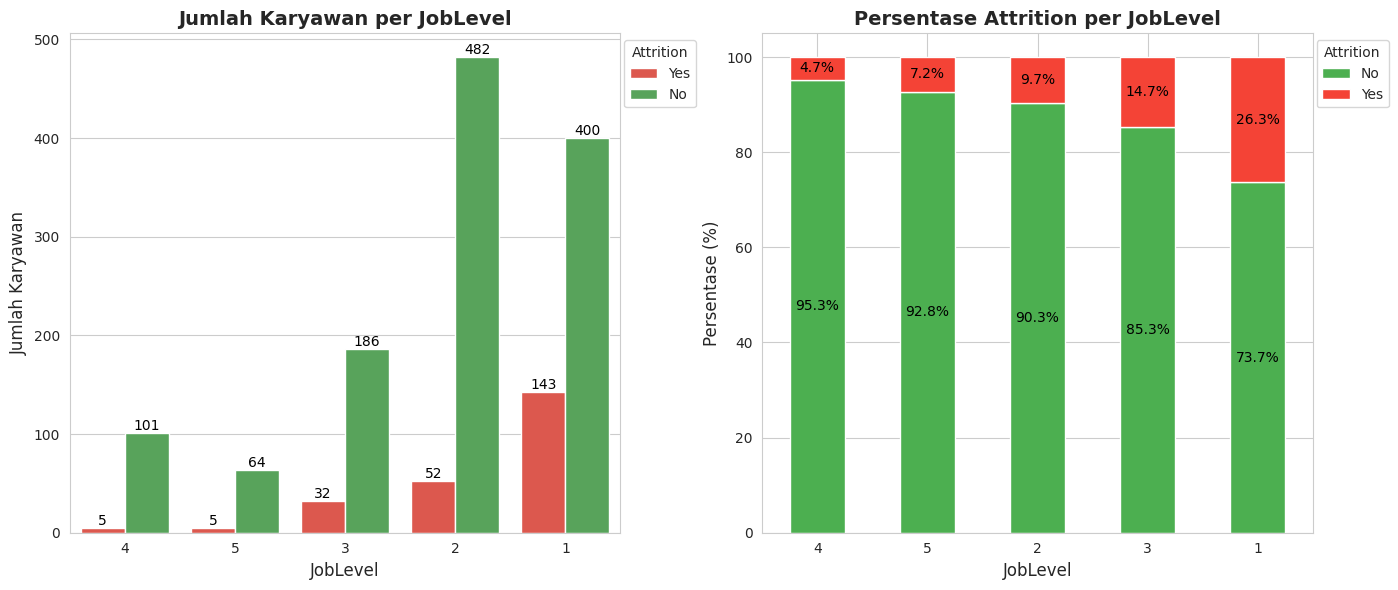

In [ ]:
joblevel_counts = df.groupby(['JobLevel', 'Attrition']).size().unstack()
joblevel_percentage = joblevel_counts.div(joblevel_counts.sum(axis=1), axis=0) * 100

joblevel_counts_sort = joblevel_counts.sort_values(by='Yes')[['Yes']].index.tolist()
joblevel_percentage_sort = joblevel_percentage.sort_values(by='Yes')[['Yes']].index.tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.set_style("whitegrid")

sns.countplot(data=df, x='JobLevel', hue='Attrition', order=joblevel_counts_sort, palette=['#F44336', '#4CAF50'], ax=axes[0])
axes[0].set_title("Jumlah Karyawan per JobLevel", fontsize=14, fontweight='bold')
axes[0].set_xlabel("JobLevel", fontsize=12)
axes[0].set_ylabel("Jumlah Karyawan", fontsize=12)
axes[0].set_xticks([0,1,2,3,4])
axes[0].legend(title="Attrition", bbox_to_anchor=(1.15, 1), loc='upper right')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

joblevel_percentage_plot = joblevel_percentage.loc[joblevel_percentage_sort]
joblevel_percentage_plot.plot(kind='bar', stacked=True, ax=axes[1], color=['#4CAF50', '#F44336'])
axes[1].set_title("Persentase Attrition per JobLevel", fontsize=14, fontweight='bold')
axes[1].set_xlabel("JobLevel", fontsize=12)
axes[1].set_ylabel("Persentase (%)", fontsize=12)
axes[1].set_xticklabels(joblevel_percentage_plot.index, rotation=0)
axes[1].legend(title="Attrition", bbox_to_anchor=(1.15, 1), loc='upper right')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Apakah karyawan baru (dengan masa kerja ≤ kuartil pertama/Q1) lebih rentan untuk resign?

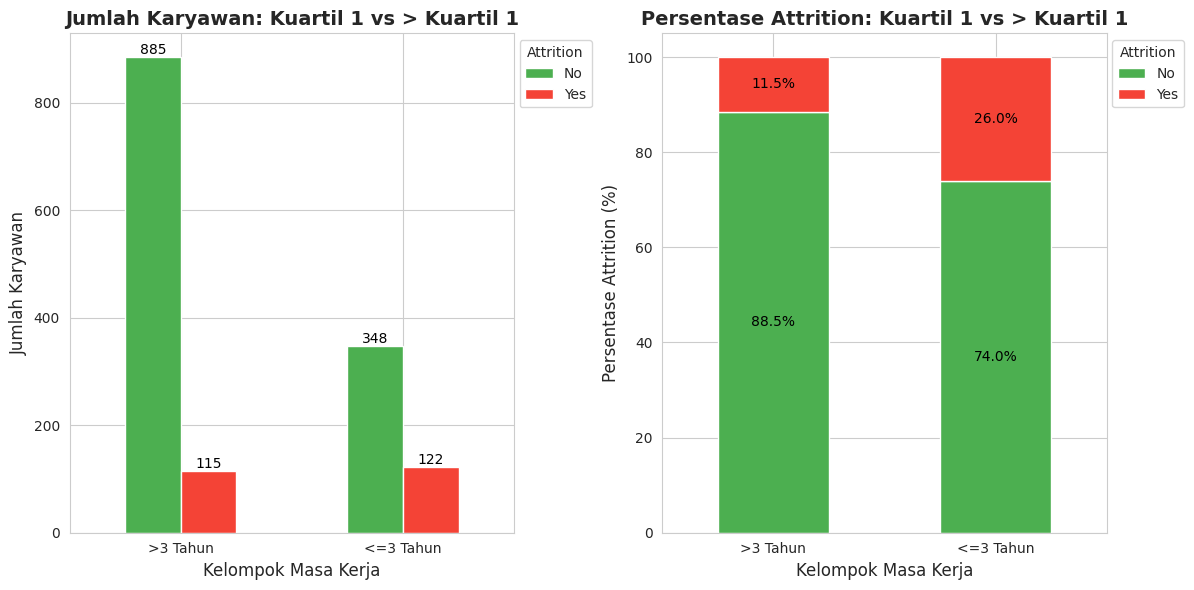

In [ ]:
attrition_new = df[df['YearsAtCompany'] <= 3].groupby('Attrition').size()
attrition_exp = df[df['YearsAtCompany'] > 3].groupby('Attrition').size()

attrition_comparison = pd.DataFrame({'<=3 Tahun': attrition_new, '>3 Tahun': attrition_exp}).T
attrition_comparison = attrition_comparison.sort_values(by='Yes', axis=0, ascending=True)
attrition_percentage = attrition_comparison.div(attrition_comparison.sum(axis=1), axis=0) * 100

colors = ['#4CAF50', '#F44336']
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.set_style("whitegrid")

attrition_comparison.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title("Jumlah Karyawan: Kuartil 1 vs > Kuartil 1", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kelompok Masa Kerja", fontsize=12)
axes[0].set_ylabel("Jumlah Karyawan", fontsize=12)
axes[0].legend(title="Attrition", bbox_to_anchor=(1.19,1), loc='upper right')
axes[0].set_xticklabels(attrition_comparison.index, rotation=0)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

attrition_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=colors)
axes[1].set_title("Persentase Attrition: Kuartil 1 vs > Kuartil 1", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kelompok Masa Kerja", fontsize=12)
axes[1].set_ylabel("Persentase Attrition (%)", fontsize=12)
axes[1].legend(title="Attrition", bbox_to_anchor=(1.19,1), loc='upper right')
axes[1].set_xticklabels(attrition_percentage.index, rotation=0)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Apakah gaji rendah berkorelasi dengan attrition?

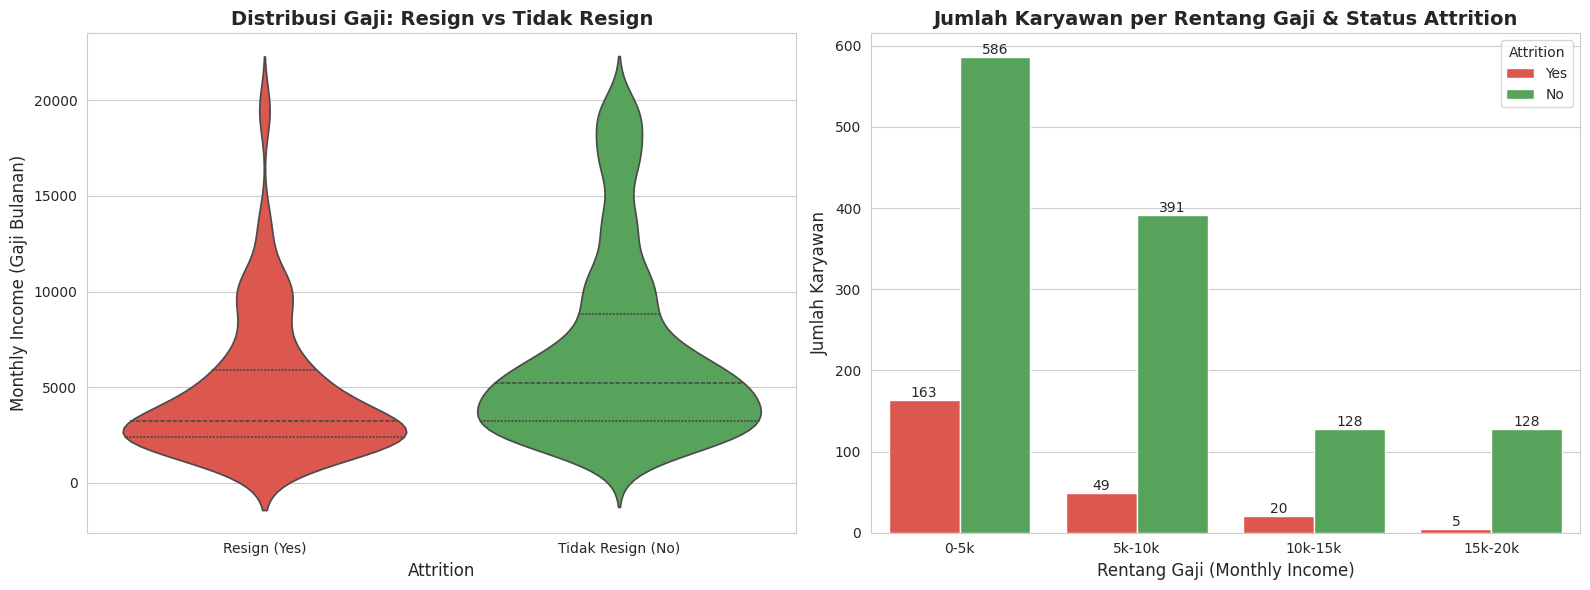

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

sns.violinplot( x='Attrition', y='MonthlyIncome', hue="Attrition", data=df, inner='quartile', palette=['#F44336', '#4CAF50'], ax=axes[0])
axes[0].set_title("Distribusi Gaji: Resign vs Tidak Resign", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Attrition", fontsize=12)
axes[0].set_ylabel("Monthly Income (Gaji Bulanan)", fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Resign (Yes)', 'Tidak Resign (No)'])

bins = [0, 5000, 10000, 15000, 20000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k']
df['IncomeRange'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

sns.countplot( x='IncomeRange', hue='Attrition', data=df, palette=['#F44336', '#4CAF50'], ax=axes[1])
axes[1].set_title("Jumlah Karyawan per Rentang Gaji & Status Attrition", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Rentang Gaji (Monthly Income)", fontsize=12)
axes[1].set_ylabel("Jumlah Karyawan", fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()
plt.show()

### Apakah ada perbedaan attrition antar Department?

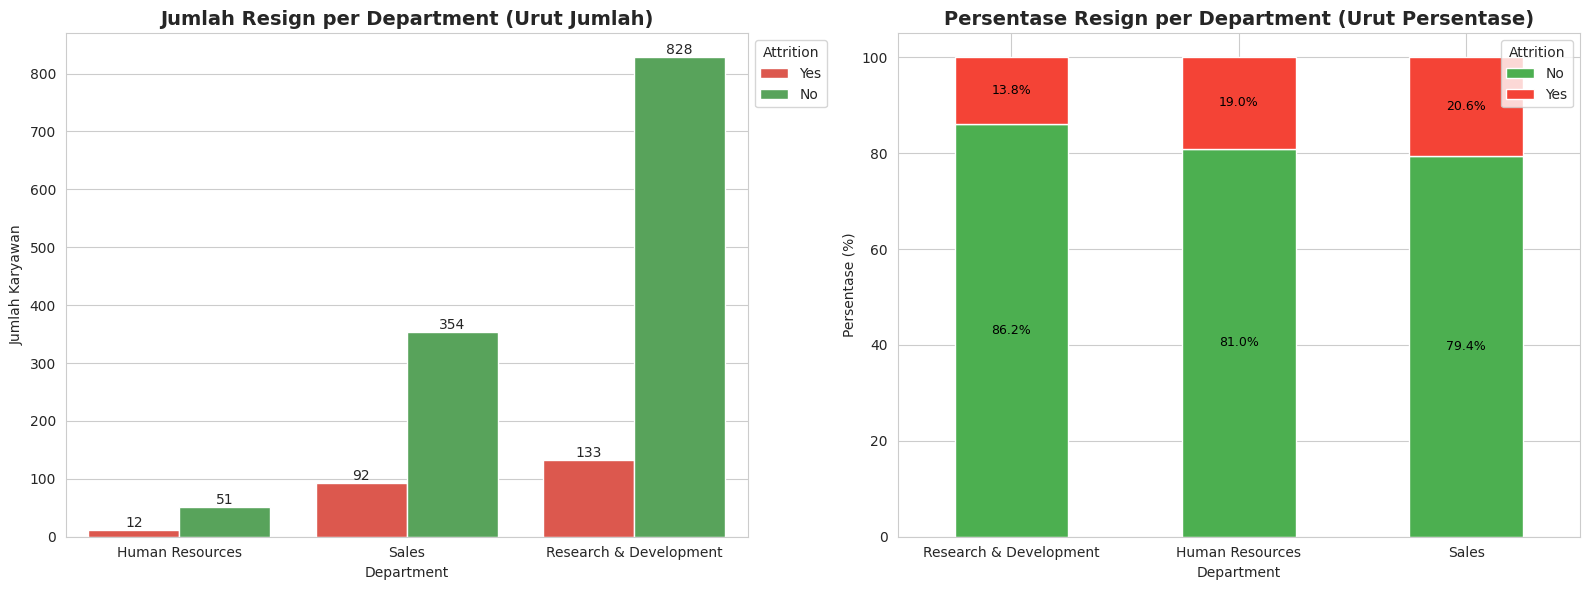

In [ ]:
attrition_dept = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
attrition_dept_percent = attrition_dept.div(attrition_dept.sum(axis=1), axis=0) * 100

dept_order_count = attrition_dept.sort_values(by='Yes')[['Yes']].index.tolist()
dept_order_percent = attrition_dept_percent.sort_values(by='Yes')[['Yes']].index.tolist()

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

sns.countplot(x='Department', hue='Attrition', data=df, palette=['#F44336', '#4CAF50'], order=dept_order_count, ax=axes[0])
axes[0].set_title("Jumlah Resign per Department (Urut Jumlah)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Department")
axes[0].set_ylabel("Jumlah Karyawan")
axes[0].legend(title='Attrition', bbox_to_anchor=(1, 1))
axes[0].tick_params(axis='x', rotation=0)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

attrition_dept_percent_plot = attrition_dept_percent.loc[dept_order_percent]
attrition_dept_percent_plot.plot(kind='bar', stacked=True, color=['#4CAF50','#F44336'], ax=axes[1])
axes[1].set_title("Persentase Resign per Department (Urut Persentase)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Department")
axes[1].set_ylabel("Persentase (%)")
axes[1].legend(title="Attrition", loc='upper right')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xticks(range(len(dept_order_percent)))
axes[1].set_xticklabels(dept_order_percent)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### Apakah karyawan dengan pengalaman kerja pendek (TotalWorkingYears) lebih sering resign?

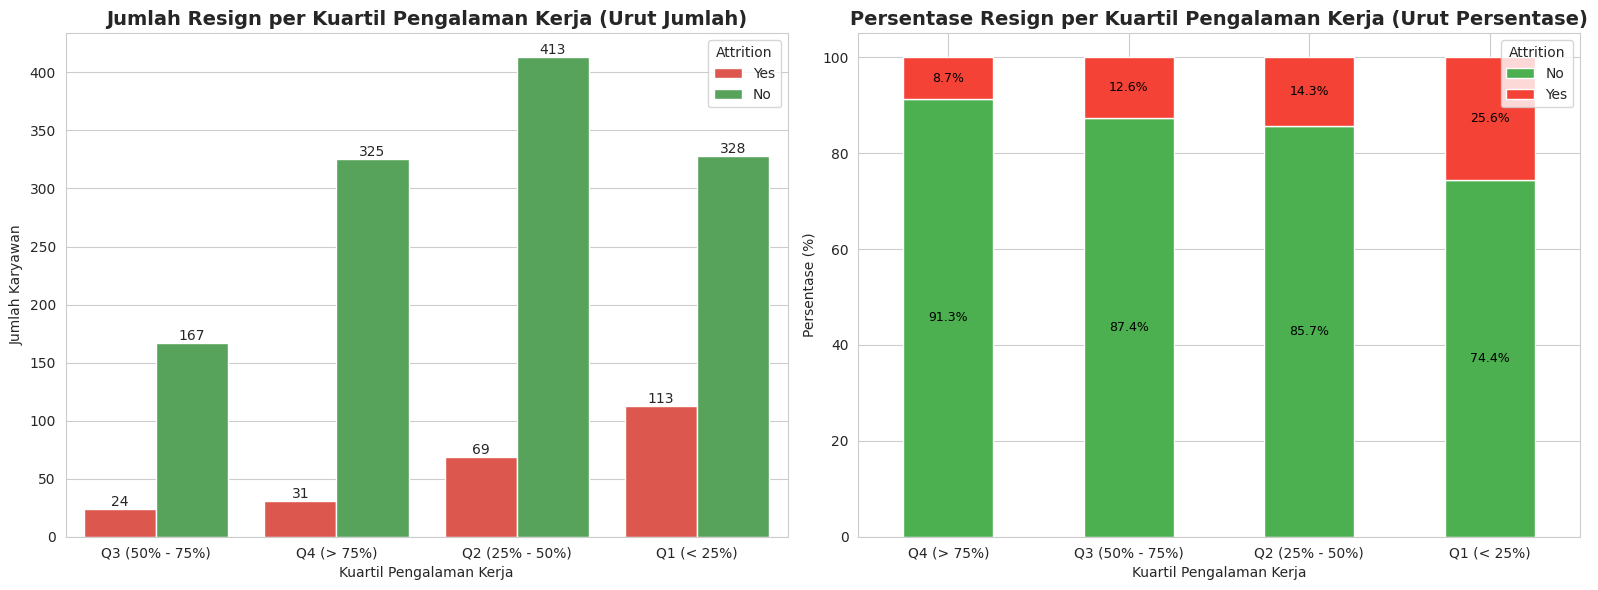

In [ ]:
# Menghitung kuartil untuk TotalWorkingYears
q1 = df['TotalWorkingYears'].quantile(0.25)
q2 = df['TotalWorkingYears'].quantile(0.5)  # Median
q3 = df['TotalWorkingYears'].quantile(0.75)

# Menambahkan kolom untuk kuartil berdasarkan TotalWorkingYears
def assign_quartile(row):
    if row <= q1:
        return 'Q1 (< 25%)'
    elif row <= q2:
        return 'Q2 (25% - 50%)'
    elif row <= q3:
        return 'Q3 (50% - 75%)'
    else:
        return 'Q4 (> 75%)'

df['Quartile'] = df['TotalWorkingYears'].apply(assign_quartile)

# Hitung jumlah attrition per kuartil
attrition_quartile = df.groupby(['Quartile', 'Attrition']).size().unstack(fill_value=0)
attrition_quartile_percent = attrition_quartile.div(attrition_quartile.sum(axis=1), axis=0) * 100

# Urutkan kuartil berdasarkan jumlah 'Yes' (resign)
quartile_order_count = attrition_quartile.sort_values(by='Yes')[['Yes']].index.tolist()
quartile_order_percent = attrition_quartile_percent.sort_values(by='Yes')[['Yes']].index.tolist()

# Buat dua subplots
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

# Grafik pertama: Jumlah Resign berdasarkan Kuartil
sns.countplot(x='Quartile', hue='Attrition', data=df, palette=['#F44336', '#4CAF50'], order=quartile_order_count, ax=axes[0])
axes[0].set_title("Jumlah Resign per Kuartil Pengalaman Kerja (Urut Jumlah)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kuartil Pengalaman Kerja")
axes[0].set_ylabel("Jumlah Karyawan")
axes[0].legend(title='Attrition', bbox_to_anchor=(1, 1))
axes[0].tick_params(axis='x', rotation=0)

# Menambahkan label di setiap bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Grafik kedua: Persentase Resign berdasarkan Kuartil
attrition_quartile_percent_plot = attrition_quartile_percent.loc[quartile_order_percent]
attrition_quartile_percent_plot.plot(kind='bar', stacked=True, color=['#4CAF50','#F44336'], ax=axes[1])
axes[1].set_title("Persentase Resign per Kuartil Pengalaman Kerja (Urut Persentase)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kuartil Pengalaman Kerja")
axes[1].set_ylabel("Persentase (%)")
axes[1].legend(title="Attrition", loc='upper right')
axes[1].tick_params(axis='x', rotation=0)

# Menambahkan label persentase di setiap bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


### Apakah peluang promosi (YearsSinceLastPromotion) memengaruhi keputusan resign?

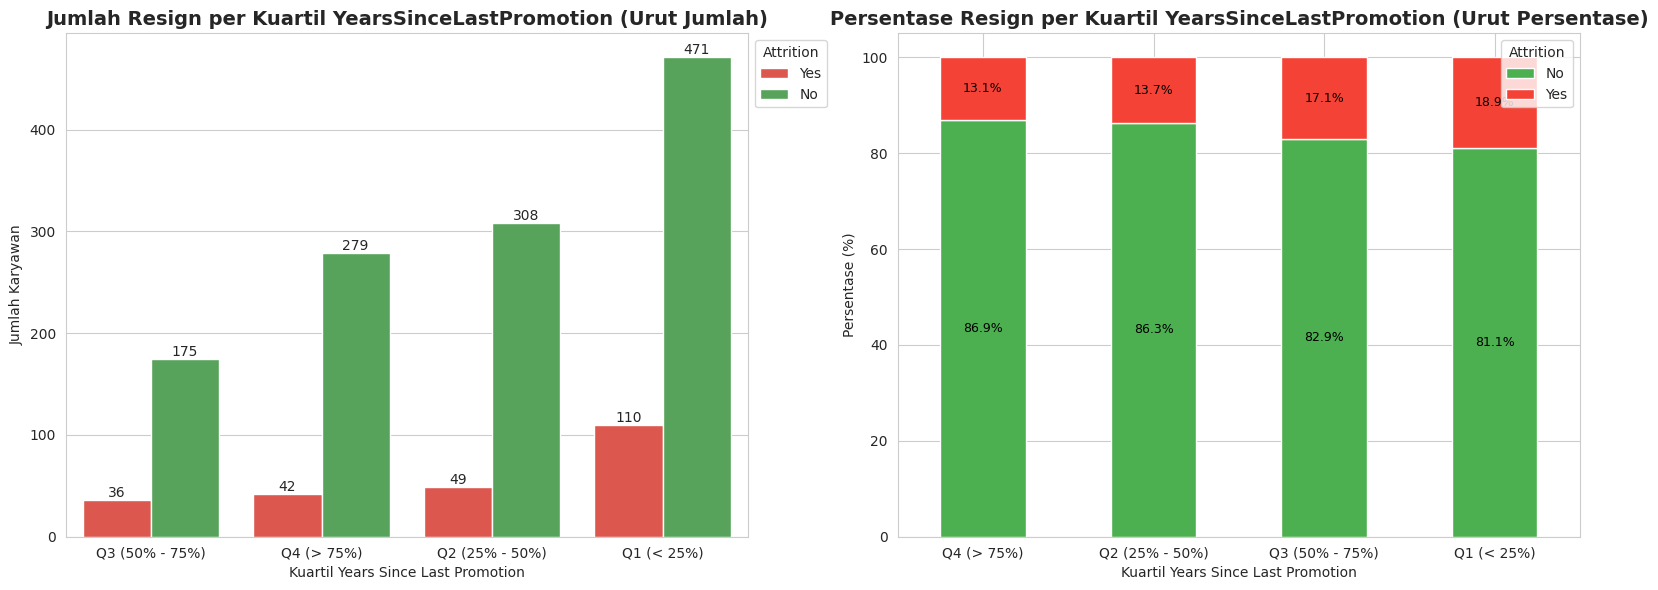

In [ ]:
# Menghitung kuartil untuk YearsSinceLastPromotion
q1 = df['YearsSinceLastPromotion'].quantile(0.25)
q2 = df['YearsSinceLastPromotion'].quantile(0.5)  # Median
q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Menambahkan kolom untuk kuartil berdasarkan YearsSinceLastPromotion
def assign_promotion_quartile(row):
    if row <= q1:
        return 'Q1 (< 25%)'
    elif row <= q2:
        return 'Q2 (25% - 50%)'
    elif row <= q3:
        return 'Q3 (50% - 75%)'
    else:
        return 'Q4 (> 75%)'

df['PromotionQuartile'] = df['YearsSinceLastPromotion'].apply(assign_promotion_quartile)

# Hitung jumlah attrition per kuartil
attrition_promotion_quartile = df.groupby(['PromotionQuartile', 'Attrition']).size().unstack(fill_value=0)
attrition_promotion_quartile_percent = attrition_promotion_quartile.div(attrition_promotion_quartile.sum(axis=1), axis=0) * 100

# Urutkan kuartil berdasarkan jumlah 'Yes' (resign)
promotion_quartile_order_count = attrition_promotion_quartile.sort_values(by='Yes')[['Yes']].index.tolist()
promotion_quartile_order_percent = attrition_promotion_quartile_percent.sort_values(by='Yes')[['Yes']].index.tolist()

# Buat dua subplots
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

# Grafik pertama: Jumlah Resign berdasarkan Kuartil YearsSinceLastPromotion
sns.countplot(x='PromotionQuartile', hue='Attrition', data=df, palette=['#F44336', '#4CAF50'], order=promotion_quartile_order_count, ax=axes[0])
axes[0].set_title("Jumlah Resign per Kuartil YearsSinceLastPromotion (Urut Jumlah)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kuartil Years Since Last Promotion")
axes[0].set_ylabel("Jumlah Karyawan")
axes[0].legend(title='Attrition', bbox_to_anchor=(1, 1))
axes[0].tick_params(axis='x', rotation=0)

# Menambahkan label di setiap bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Grafik kedua: Persentase Resign berdasarkan Kuartil YearsSinceLastPromotion
attrition_promotion_quartile_percent_plot = attrition_promotion_quartile_percent.loc[promotion_quartile_order_percent]
attrition_promotion_quartile_percent_plot.plot(kind='bar', stacked=True, color=['#4CAF50','#F44336'], ax=axes[1])
axes[1].set_title("Persentase Resign per Kuartil YearsSinceLastPromotion (Urut Persentase)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kuartil Years Since Last Promotion")
axes[1].set_ylabel("Persentase (%)")
axes[1].legend(title="Attrition", loc='upper right')
axes[1].tick_params(axis='x', rotation=0)

# Menambahkan label persentase di setiap bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()
